In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mujoco 
import mujoco.viewer
import time
import desired_kinematic as dsk
import compute_activation as ca
import force_length_velocity_functions as flv
import get_activations
import plot_functions

In [2]:
path_to_model = "../Working_Folder/tendon_quadruped_ws_inair.xml"

activation_folder = "../activation_data_files" 

In [4]:
omega = 0.5  #  lead QP solver failed for 1.5
dt = 0.005
duration_in_seconds = 10

activation_file, desired_qpos, desired_qvel, desired_qacc = get_activations.compute_and_save_activations(
    path_to_model, 
    omega, 
    dt, 
    duration_in_seconds,
    activation_folder)

muscle_activations = np.loadtxt(activation_file)

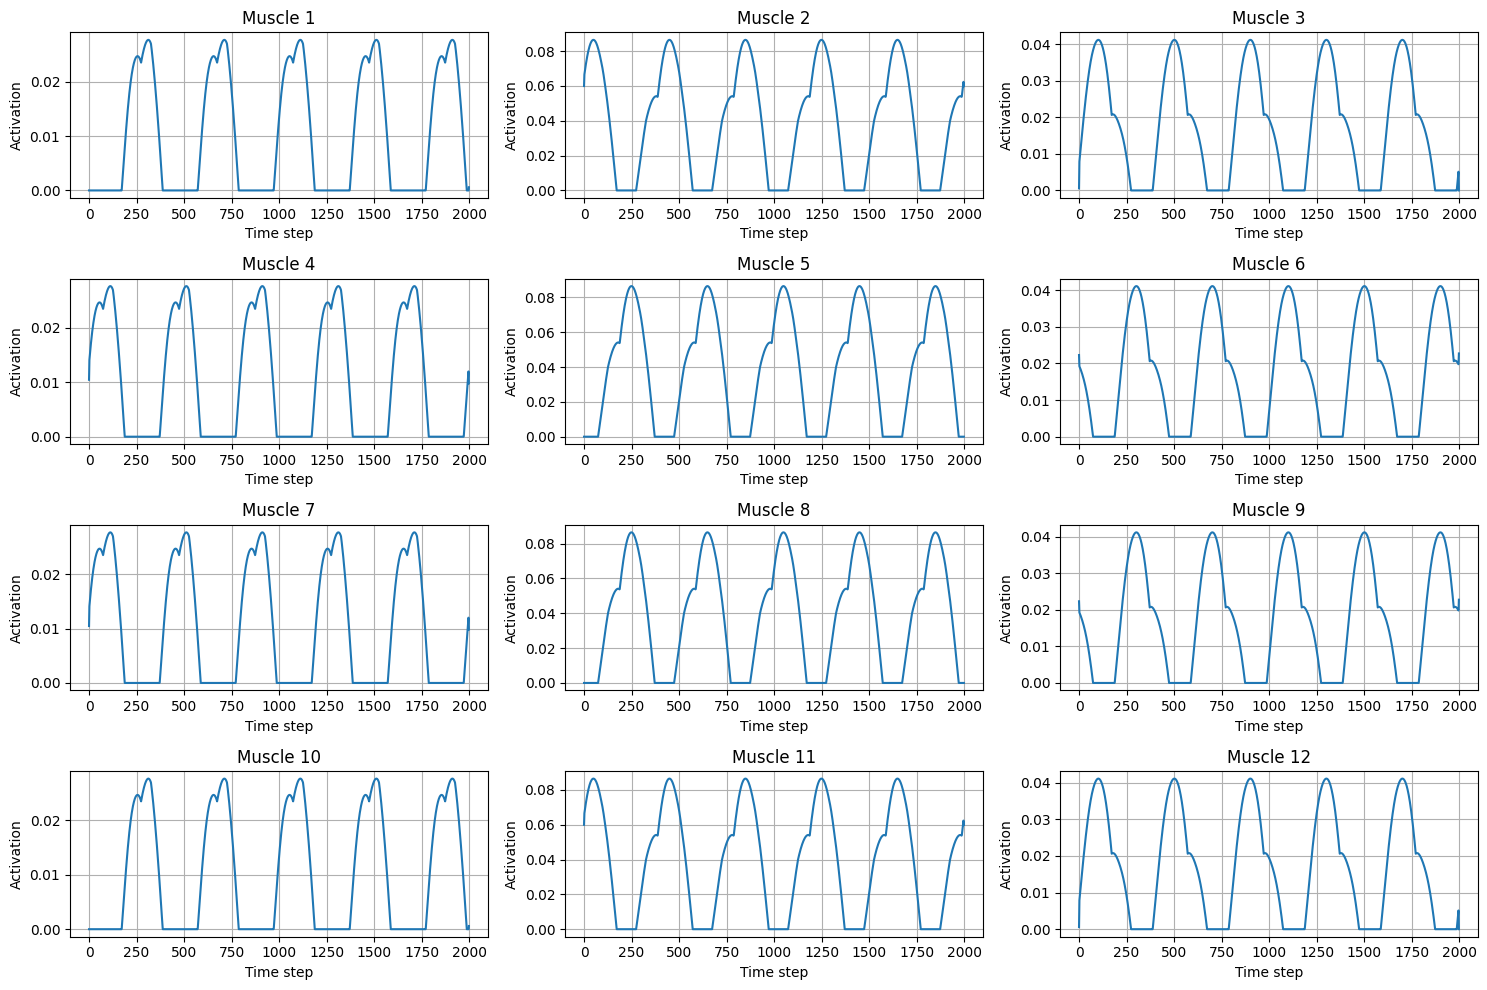

In [6]:
plot_functions.plot_muscle_activations(muscle_activations)

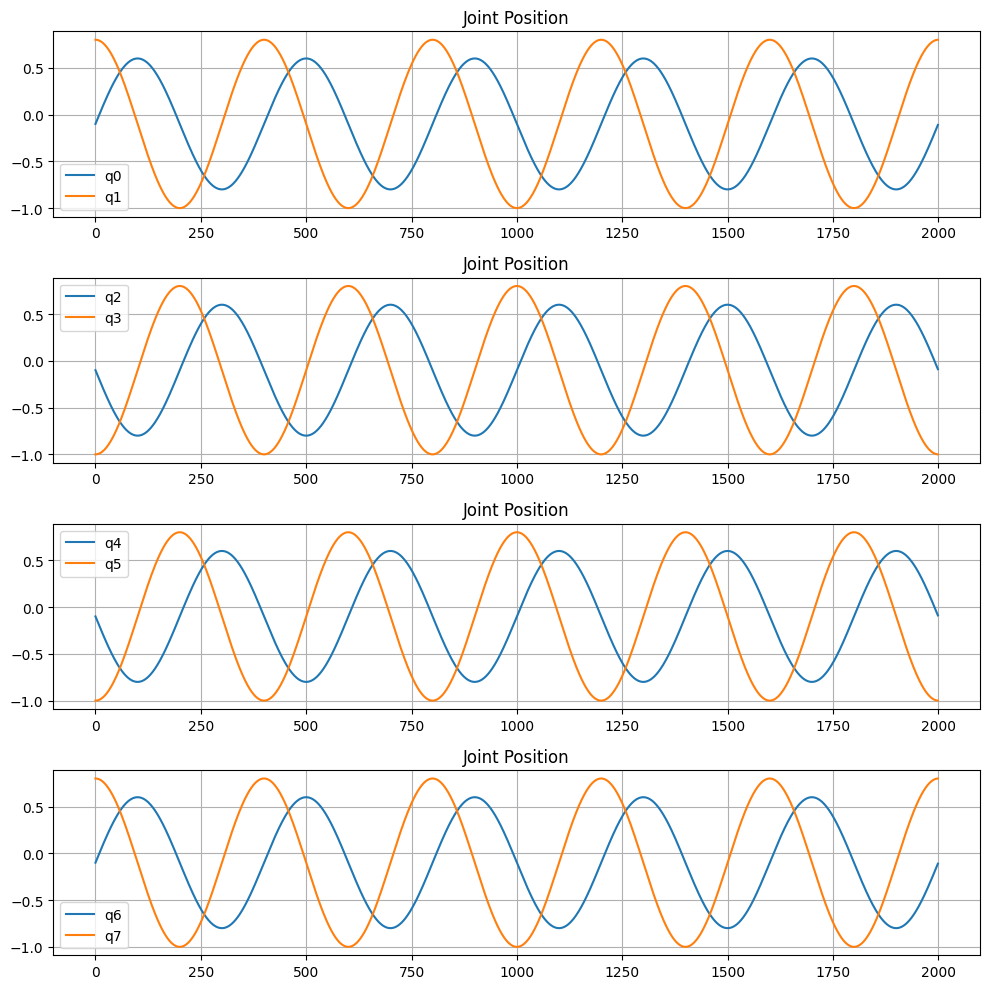

In [7]:
plot_functions.plot_joint_state(desired_qpos)

### Run simulation

In [8]:
model = mujoco.MjModel.from_xml_path(path_to_model)
data = mujoco.MjData(model)

n_steps = muscle_activations.shape[0]
attempted_qpos = np.zeros((n_steps, 8))
attempted_qvel = np.zeros((n_steps, 8))
attempted_qacc = np.zeros((n_steps, 8))
idx = 0
wait_time = 0.5

In [9]:
idx = 0
wait_time = 0.5

with mujoco.viewer.launch_passive(model, data, show_left_ui=False, show_right_ui=True) as viewer:

    for idx in range(n_steps):
        step_start = time.time()
        data.ctrl[:] = muscle_activations[idx,:] * 100
        mujoco.mj_step(model, data)
        attempted_qpos[idx,:] = data.qpos
        attempted_qvel[idx,:] = data.qvel
        attempted_qacc[idx,:] = data.qacc
        viewer.sync()
    

        time_until_next_step = model.opt.timestep - (time.time() - step_start)
        if time_until_next_step > 0:
            time.sleep(time_until_next_step)

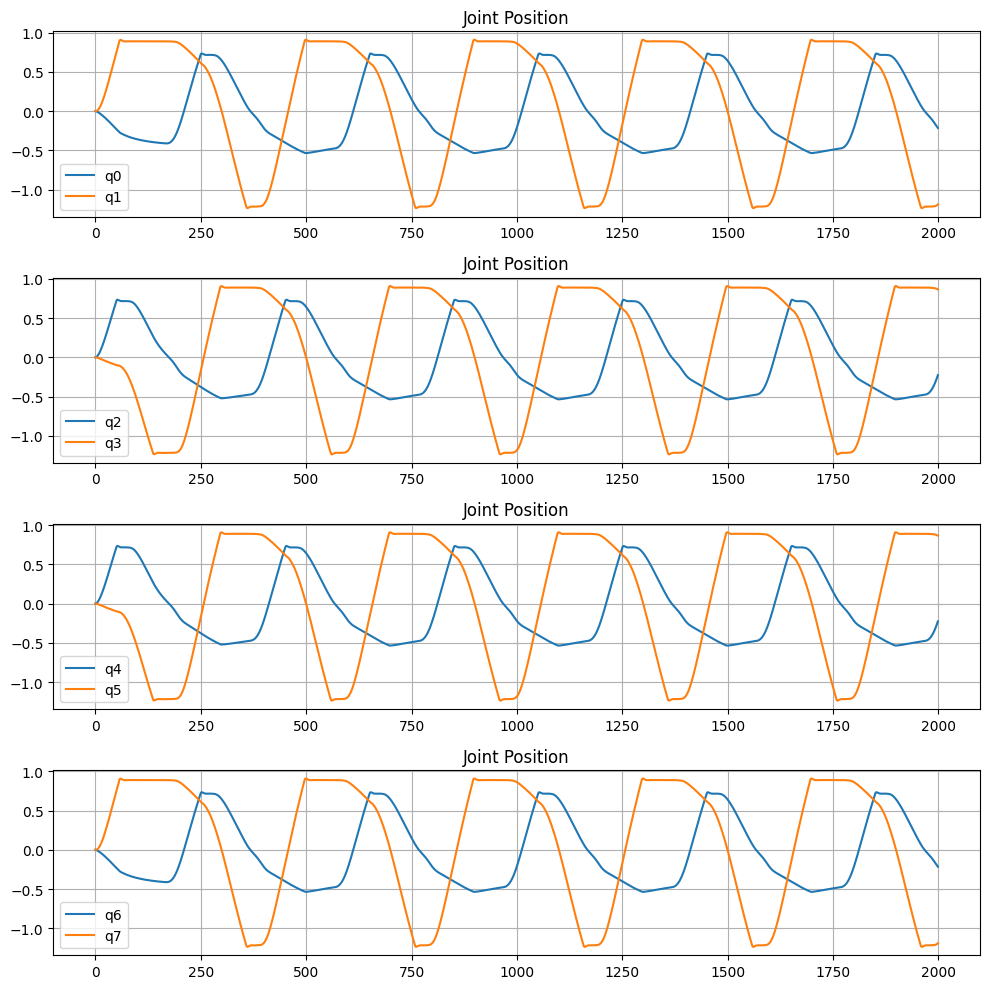

In [10]:
plot_functions.plot_joint_state(attempted_qpos)